<a href="https://colab.research.google.com/github/JoseGabriel-ITD/Main/blob/main/Instrumentos/Analisis_factorial_confirmatorio_IAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Desarrollo y validación de escala de aceptación y uso de la inteligencia artificial generativa en docentes** #

### **Rodríguez-Rivas José Gabriel**
#### gabriel.rodriguez@itdurango.edu.mx
#### Tecnológico Nacional de México / Instituto Tecnológico de Durango
#### https://orcid.org/0000-0002-7031-5097

**RESUMEN**
La inteligencia artificial generativa (IAG) representa una herramienta disruptiva en la educación superior, con potencial para transformar la enseñanza, la investigación y la gestión académica. Esta investigación evalúa la validez y confiabilidad de un instrumento basado en el Modelo de Aceptación Tecnológica (TAM) para medir la percepción docente sobre el uso de la IAG. Se realizó un estudio cuantitativo, no experimental, transversal y de tipo descriptivo-correlacional, con enfoque instrumental, orientado a la validación de un instrumento para medir la percepción docente sobre el uso de la IAG. Como resultado se realizó el cuestionario que se denominó Escala de Aceptación y Uso de la Inteligencia Artificial Generativa (EAU-IAG). Los análisis factoriales exploratorio y confirmatorio evidenciaron una estructura válida y confiable del instrumento, con cuatro factores alineados al TAM, explicando el 63.96% de la varianza. Las cargas factoriales fueron altas y los coeficientes alfa de Cronbach por dimensión indicaron buena consistencia interna, respaldando su uso en contextos educativos para evaluar la aceptación de la IAG.
Palabras clave: Educacion Superior, enseñanza, integración tecnológica en el aula, Inteligencia Artificial Generativa (IAG),  Modelo de Aceptación Tecnológica (TAM)



## **El análisis factorial confirmatorio (AFC)**

El análisis factorial confirmatorio (AFC) es una técnica estadística utilizada para verificar si los datos se ajustan a una estructura teórica predefinida. A diferencia del análisis factorial exploratorio, que busca identificar la estructura subyacente de los datos sin hipótesis previas, el AFC se basa en hipótesis específicas sobre la relación entre las variables observadas y los factores latentes.

- ¿Qué te va a mostrar?
- Cargas factoriales de cada ítem en su factor.

- Índices de ajuste como RMSEA, CFI, GFI, etc.

- Te va a decir si tu modelo TAM (4 factores) se ajusta bien a los datos o no.

## semopy
#### Es una librería potente y bien documentada para hacer modelos SEM, incluyendo AFC.

- Preparar tus datos. Usá un archivo .csv o exportá tus datos desde SPSS a Excel o CSV.
- Asegurate de que las columnas tengan nombres simples (por ejemplo, i1, i2, ..., i20).

In [40]:
# Instalar libreria en caso de ser necesario
!pip install semopy

In [42]:
from semopy import Model, Optimizer, calc_stats
import pandas as pd

# Cargar los datos
data = pd.read_csv("Datos_TAM.csv", encoding="utf-8")
data.head(3)

,Sexo,Edad,Departamento,item1,item2,item3,item4,item5,item6,item7,...,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20
0,Masculino,43,Ingeniería Eléctrica-Electrónica,5,5,4,4,4,5,4,...,4,4,4,4,2,4,4,4,4,5
1,Femenino,51,Ciencias básicas,4,4,5,4,5,4,4,...,5,5,5,4,4,5,5,5,5,5
2,Masculino,76,Ciencias de la tierra,4,4,4,4,4,4,4,...,5,4,4,4,4,2,2,4,4,4


In [43]:
# Seleccionar las columnas de interés
columnas = ['Sexo', 'Edad', 'Departamento']

# Estadísticas descriptivas generales
estadisticas = data[columnas].describe(include='all')

# Mostrar los resultados
print("Estadísticas descriptivas:")
print(estadisticas)

Estadísticas descriptivas:
             Sexo        Edad              Departamento
count         100  100.000000                       100
unique          2         NaN                         8
top     Masculino         NaN  Sistemas Computacionales
freq           57         NaN                        24
mean          NaN   51.530000                       NaN
std           NaN   10.804465                       NaN
min           NaN   32.000000                       NaN
25%           NaN   43.000000                       NaN
50%           NaN   50.000000                       NaN
75%           NaN   60.000000                       NaN
max           NaN   79.000000                       NaN


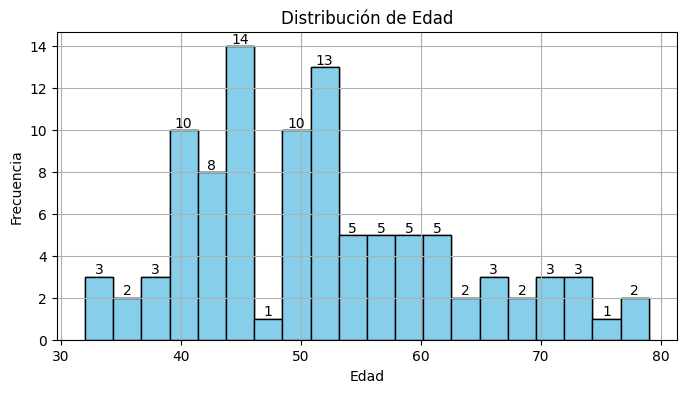

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
# Histograma para 'Edad'
plt.hist(data['Edad'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)

counts, bins, patches = plt.hist(data['Edad'], bins=20, color='skyblue', edgecolor='black')

for count, x in zip(counts, bins):
  plt.text(x + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom')

plt.show()

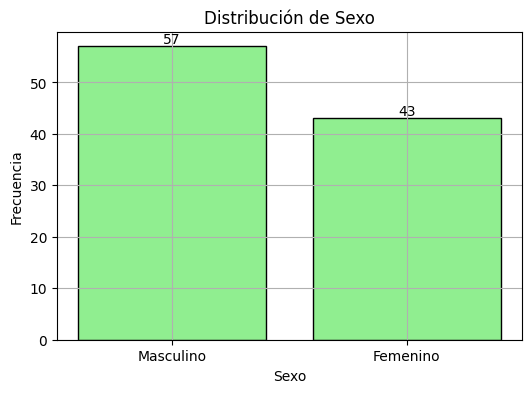

In [45]:

plt.figure(figsize=(6, 4))
sexo_counts = data['Sexo'].value_counts()
bars = plt.bar(sexo_counts.index, sexo_counts.values, color='lightgreen', edgecolor='black')
plt.title('Distribución de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.grid(True)
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.show()

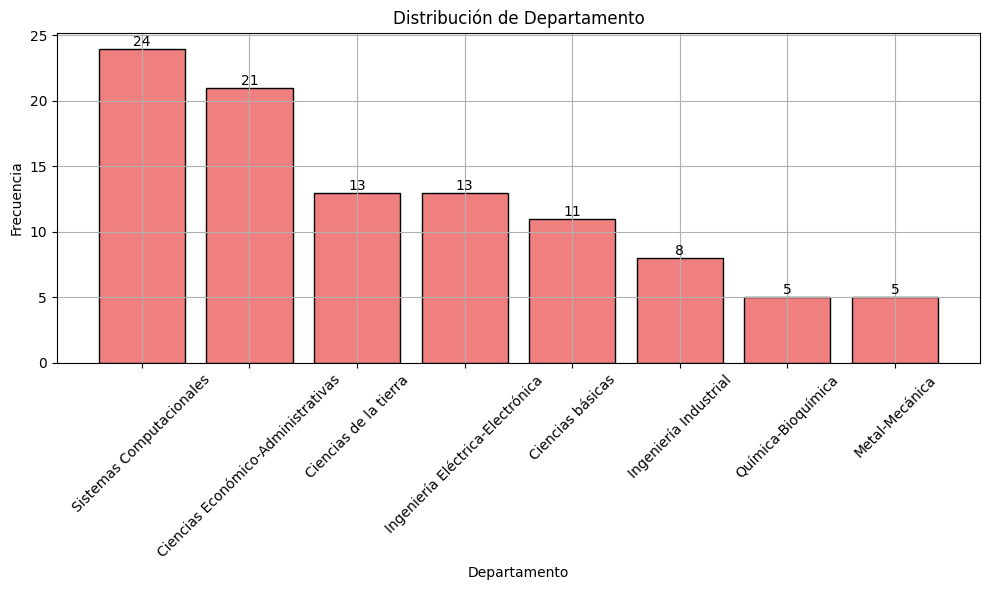

In [49]:
# Gráfico de barras para 'Departamento'
plt.figure(figsize=(10, 6))
departamento_counts = data['Departamento'].value_counts()
bars = plt.bar(departamento_counts.index, departamento_counts.values, color='lightcoral', edgecolor='black')
plt.title('Distribución de Departamento')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(True)
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [50]:
# Modelo TAM (AFC)
modelo = """
UP =~ item1 + item2 + item3 + item4 + item5
FUP =~ item6 + item7 + item8 + item9 + item10
AU =~ item11 + item12 + item13 + item14 + item15
IU =~ item16 + item17 + item18 + item19 + item20
"""

# Paso 3: Crear el modelo y cargar los datos
mod = Model(modelo)
mod.fit(data)  # <-- Acá es donde se ajusta directamente (ya no usamos Optimizer)

# Paso 4: Mostrar resultados
print("\n🔎 Cargas factoriales y errores estándar:")
print(mod.inspect())

print("\n📊 Índices de ajuste:")
stats = calc_stats(mod)
print(stats)


🔎 Cargas factoriales y errores estándar:
      lval  op    rval  Estimate  Std. Err   z-value   p-value
0    item1   ~      UP  1.000000         -         -         -
1    item2   ~      UP  1.182652  0.209049  5.657293       0.0
2    item3   ~      UP  0.965739  0.182691  5.286202       0.0
3    item4   ~      UP  1.268054  0.204918  6.188102       0.0
4    item5   ~      UP  1.065518  0.171619  6.208619       0.0
5    item6   ~     FUP  1.000000         -         -         -
6    item7   ~     FUP  0.834653  0.140629  5.935153       0.0
7    item8   ~     FUP  0.798459  0.154404  5.171221       0.0
8    item9   ~     FUP  1.072477  0.169318  6.334105       0.0
9   item10   ~     FUP  0.939762  0.155824  6.030922       0.0
10  item11   ~      AU  1.000000         -         -         -
11  item12   ~      AU  1.032608  0.143555  7.193114       0.0
12  item13   ~      AU  1.236124  0.154419  8.004987       0.0
13  item14   ~      AU  1.172553  0.155774  7.527263       0.0
14  item15   

      lval op rval  Estimate  Std. Err   z-value p-value
0    item1  ~   UP  1.000000         -         -       -
1    item2  ~   UP  1.182652  0.209049  5.657293     0.0
2    item3  ~   UP  0.965739  0.182691  5.286202     0.0
3    item4  ~   UP  1.268054  0.204918  6.188102     0.0
4    item5  ~   UP  1.065518  0.171619  6.208619     0.0
5    item6  ~  FUP  1.000000         -         -       -
6    item7  ~  FUP  0.834653  0.140629  5.935153     0.0
7    item8  ~  FUP  0.798459  0.154404  5.171221     0.0
8    item9  ~  FUP  1.072477  0.169318  6.334105     0.0
9   item10  ~  FUP  0.939762  0.155824  6.030922     0.0
10  item11  ~   AU  1.000000         -         -       -
11  item12  ~   AU  1.032608  0.143555  7.193114     0.0
12  item13  ~   AU  1.236124  0.154419  8.004987     0.0
13  item14  ~   AU  1.172553  0.155774  7.527263     0.0
14  item15  ~   AU  1.034356  0.145591  7.104533     0.0
15  item16  ~   IU  1.000000         -         -       -
16  item17  ~   IU  1.019341  0

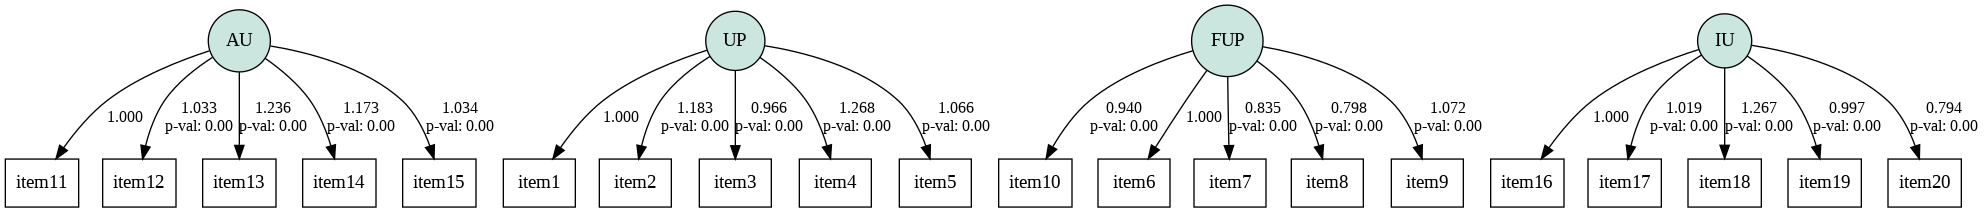

In [51]:
#   Mostrar cargas factoriales por dimension
from semopy import ModelMeans, semplot, calc_stats

import pandas as pd
from PIL import Image

# Cargar datos
data = pd.read_csv("Datos_TAM.csv")

# Definición del modelo
desc = """
UP =~ item1 + item2 + item3 + item4 + item5
FUP =~ item6 + item7 + item8 + item9 + item10
AU =~ item11 + item12 + item13 + item14 + item15
IU =~ item16 + item17 + item18 + item19 + item20

UP ~~ FUP
UP ~~ AU
UP ~~ IU
FUP ~~ AU
FUP ~~ IU
AU ~~ IU
"""

# Ajustar modelo
model = Model(desc)
model.fit(data)

ins = model.inspect()
print(ins.head(20))

# Crear y mostrar el path diagram
semplot(model, "path_diagram_TAM1.png", show='estimates')

# Mostrar la imagen
img = "path_diagram_TAM1.png"
from IPython.display import Image
Image(filename=img)

In [52]:
stats = calc_stats(model)

# Ver todas las claves disponibles
print(stats.keys())

# Acceder a la clave correcta (ajustar según lo que imprima el diccionario)
omega = stats.get('omega_total', 'Omega no disponible')
print(f'Omega de McDonald: {omega}')


Index(['DoF', 'DoF Baseline', 'chi2', 'chi2 p-value', 'chi2 Baseline', 'CFI',
       'GFI', 'AGFI', 'NFI', 'TLI', 'RMSEA', 'AIC', 'BIC', 'LogLik'],
      dtype='object')
Omega de McDonald: Omega no disponible


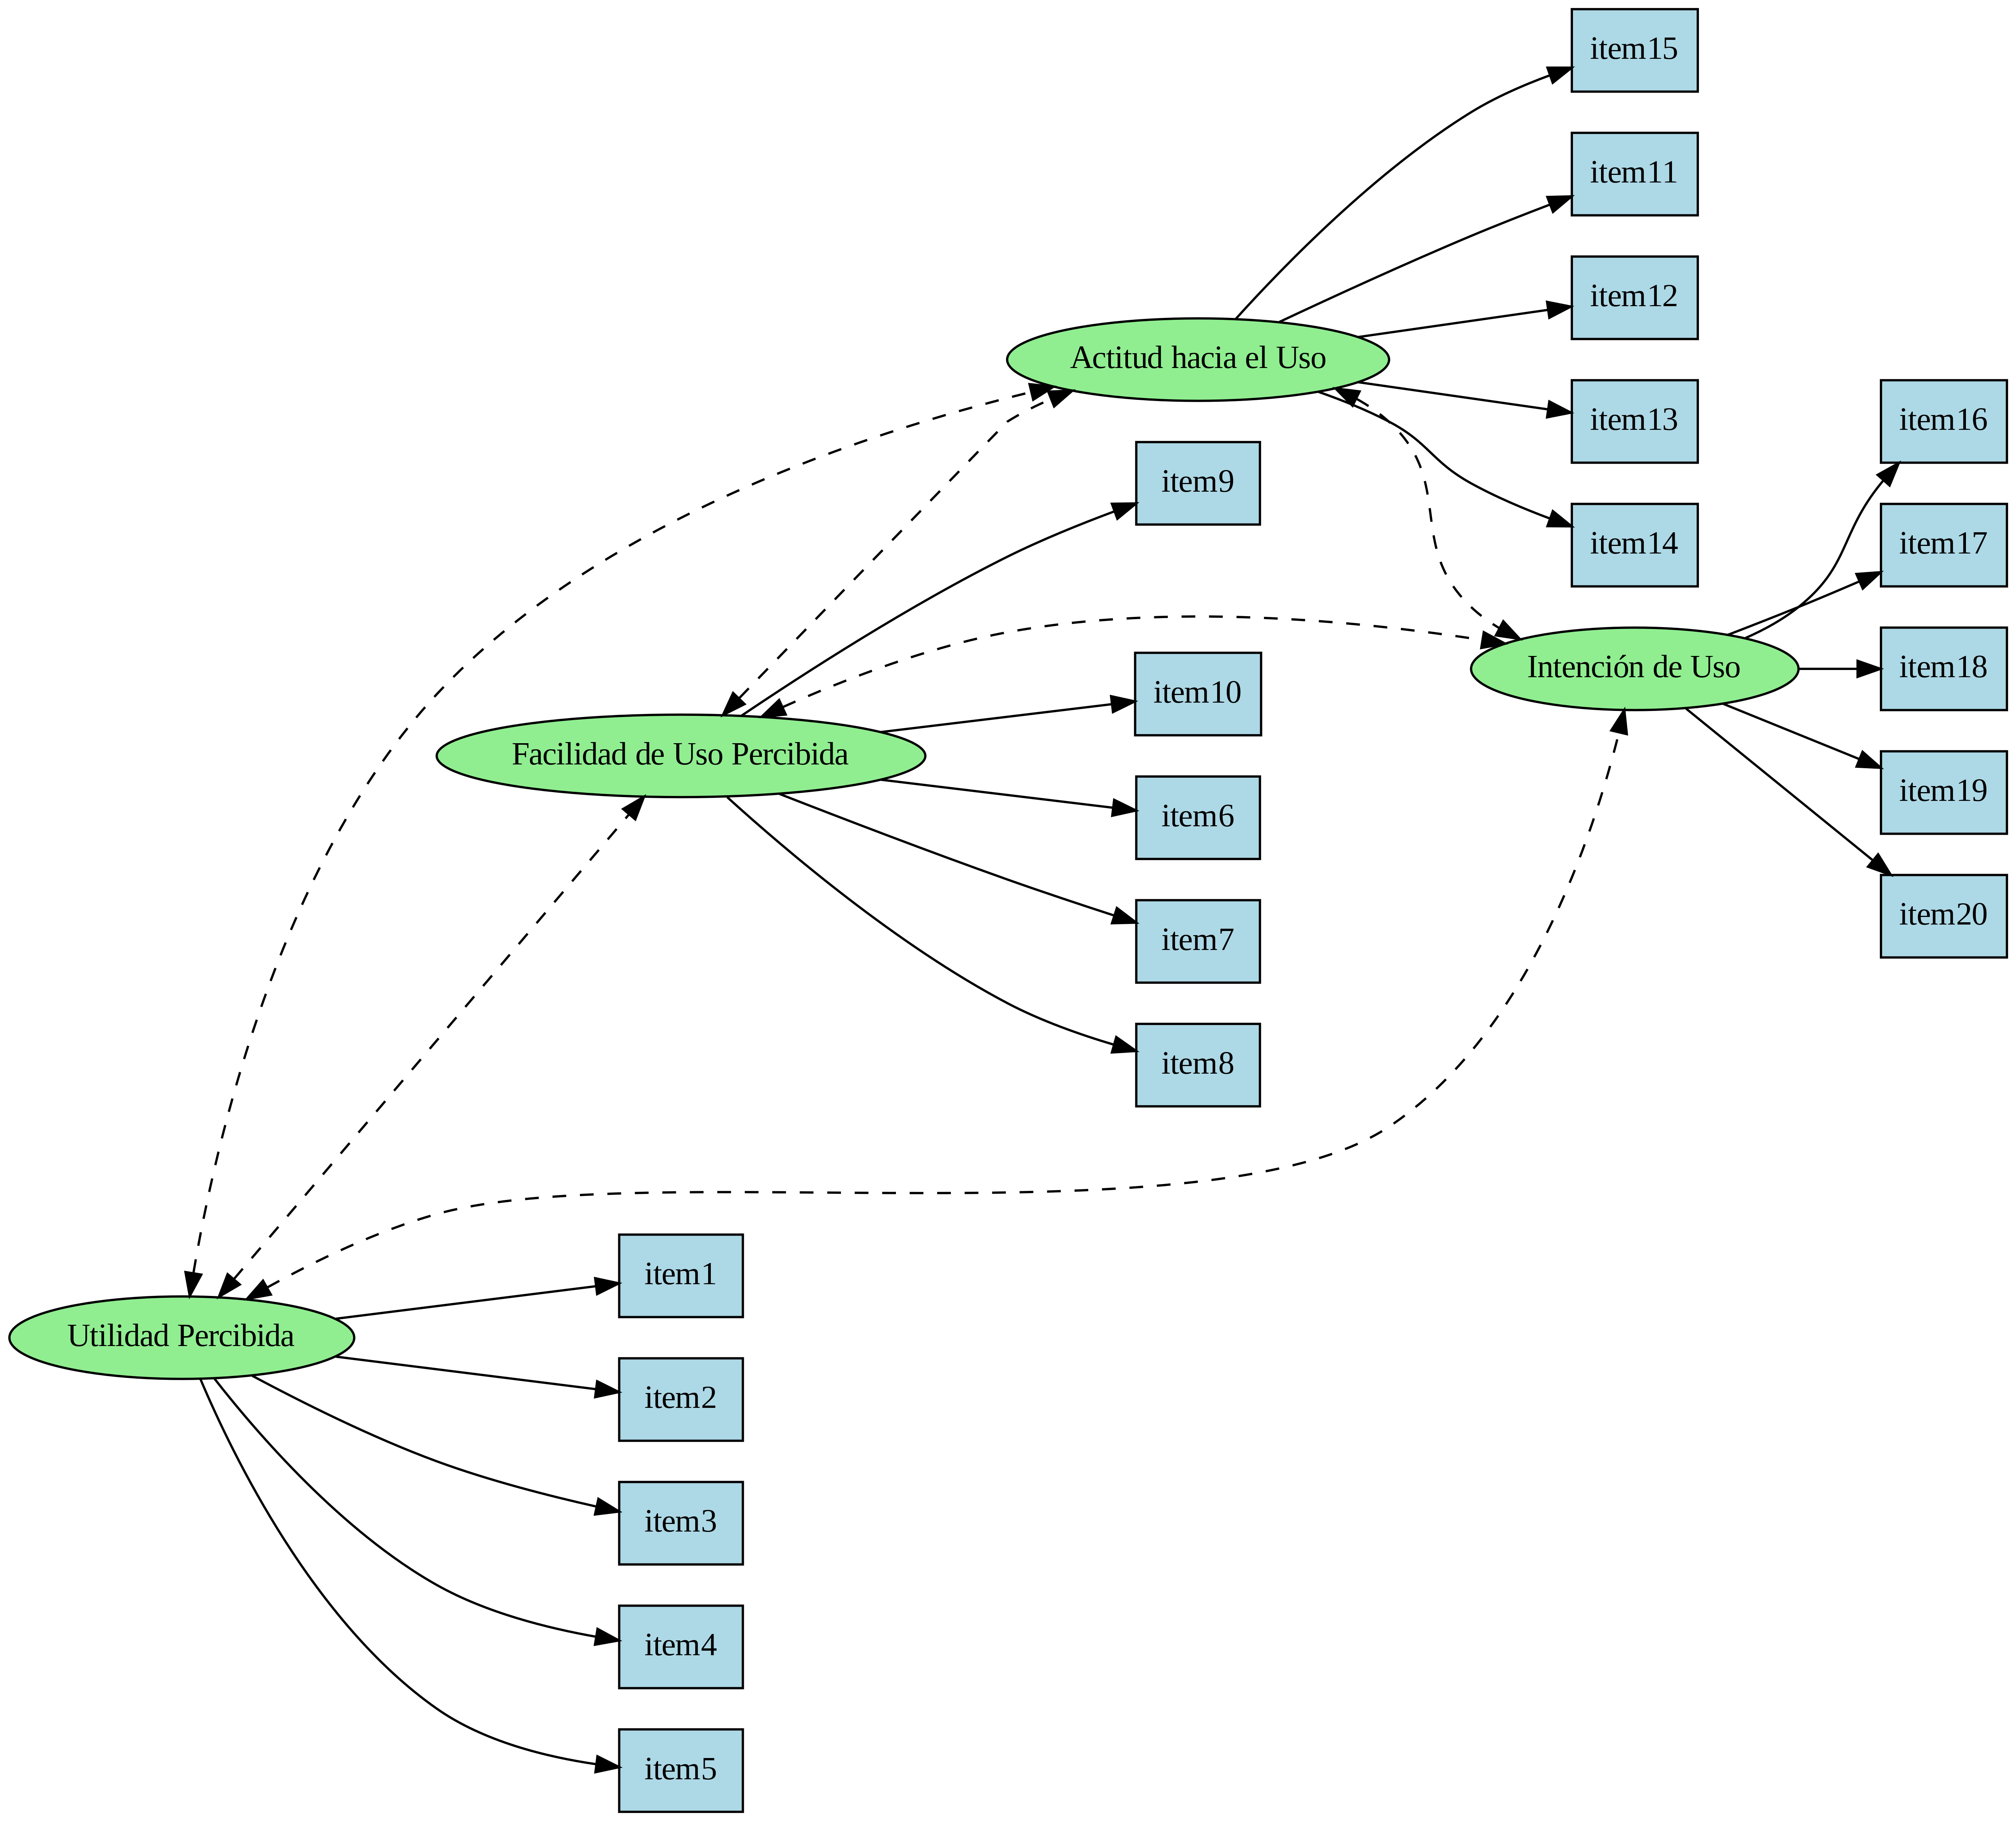

In [53]:
from graphviz import Digraph

# Crear el diagrama de ruta
dot = Digraph(format='png')
dot.attr(rankdir='LR', size='10,8')
dot.attr('graph', dpi='600')  # Aumentar la resolución

dot.attr('node', shape='box', style='filled', fillcolor='lightblue')

# Factores latentes
factors = {
    'UP': 'Utilidad Percibida',
    'FUP': 'Facilidad de Uso Percibida',
    'AU': 'Actitud hacia el Uso',
    'IU': 'Intención de Uso'
}

for code, name in factors.items():
    dot.node(code, name, shape='ellipse', fillcolor='lightgreen')

# Variables observadas agrupadas por factor
observed = {
    'UP': ['item1', 'item2', 'item3', 'item4', 'item5'],
    'FUP': ['item6', 'item7', 'item8', 'item9', 'item10'],
    'AU': ['item11', 'item12', 'item13', 'item14', 'item15'],
    'IU': ['item16', 'item17', 'item18', 'item19', 'item20']
}

# Añadir nodos y relaciones entre latentes y observadas
for factor, items in observed.items():
    for item in items:
        dot.node(item, item)
        dot.edge(factor, item)

# Relaciones entre factores latentes (correlaciones)
factor_pairs = [('UP', 'FUP'), ('UP', 'AU'), ('UP', 'IU'),
                ('FUP', 'AU'), ('FUP', 'IU'), ('AU', 'IU')]

for f1, f2 in factor_pairs:
    dot.edge(f1, f2, dir='both', style='dashed')

# Renderizar el diagrama
path = '/mnt/data/path_diagram_TAM_AFC1'
dot.render(path, cleanup=False)
path + '.png'

# Ruta de la imagen
image_path = '/mnt/data/path_diagram_TAM_AFC1.png'

# Mostrar la imagen
from IPython.display import Image
Image(filename=image_path)


## **Agregar valores**

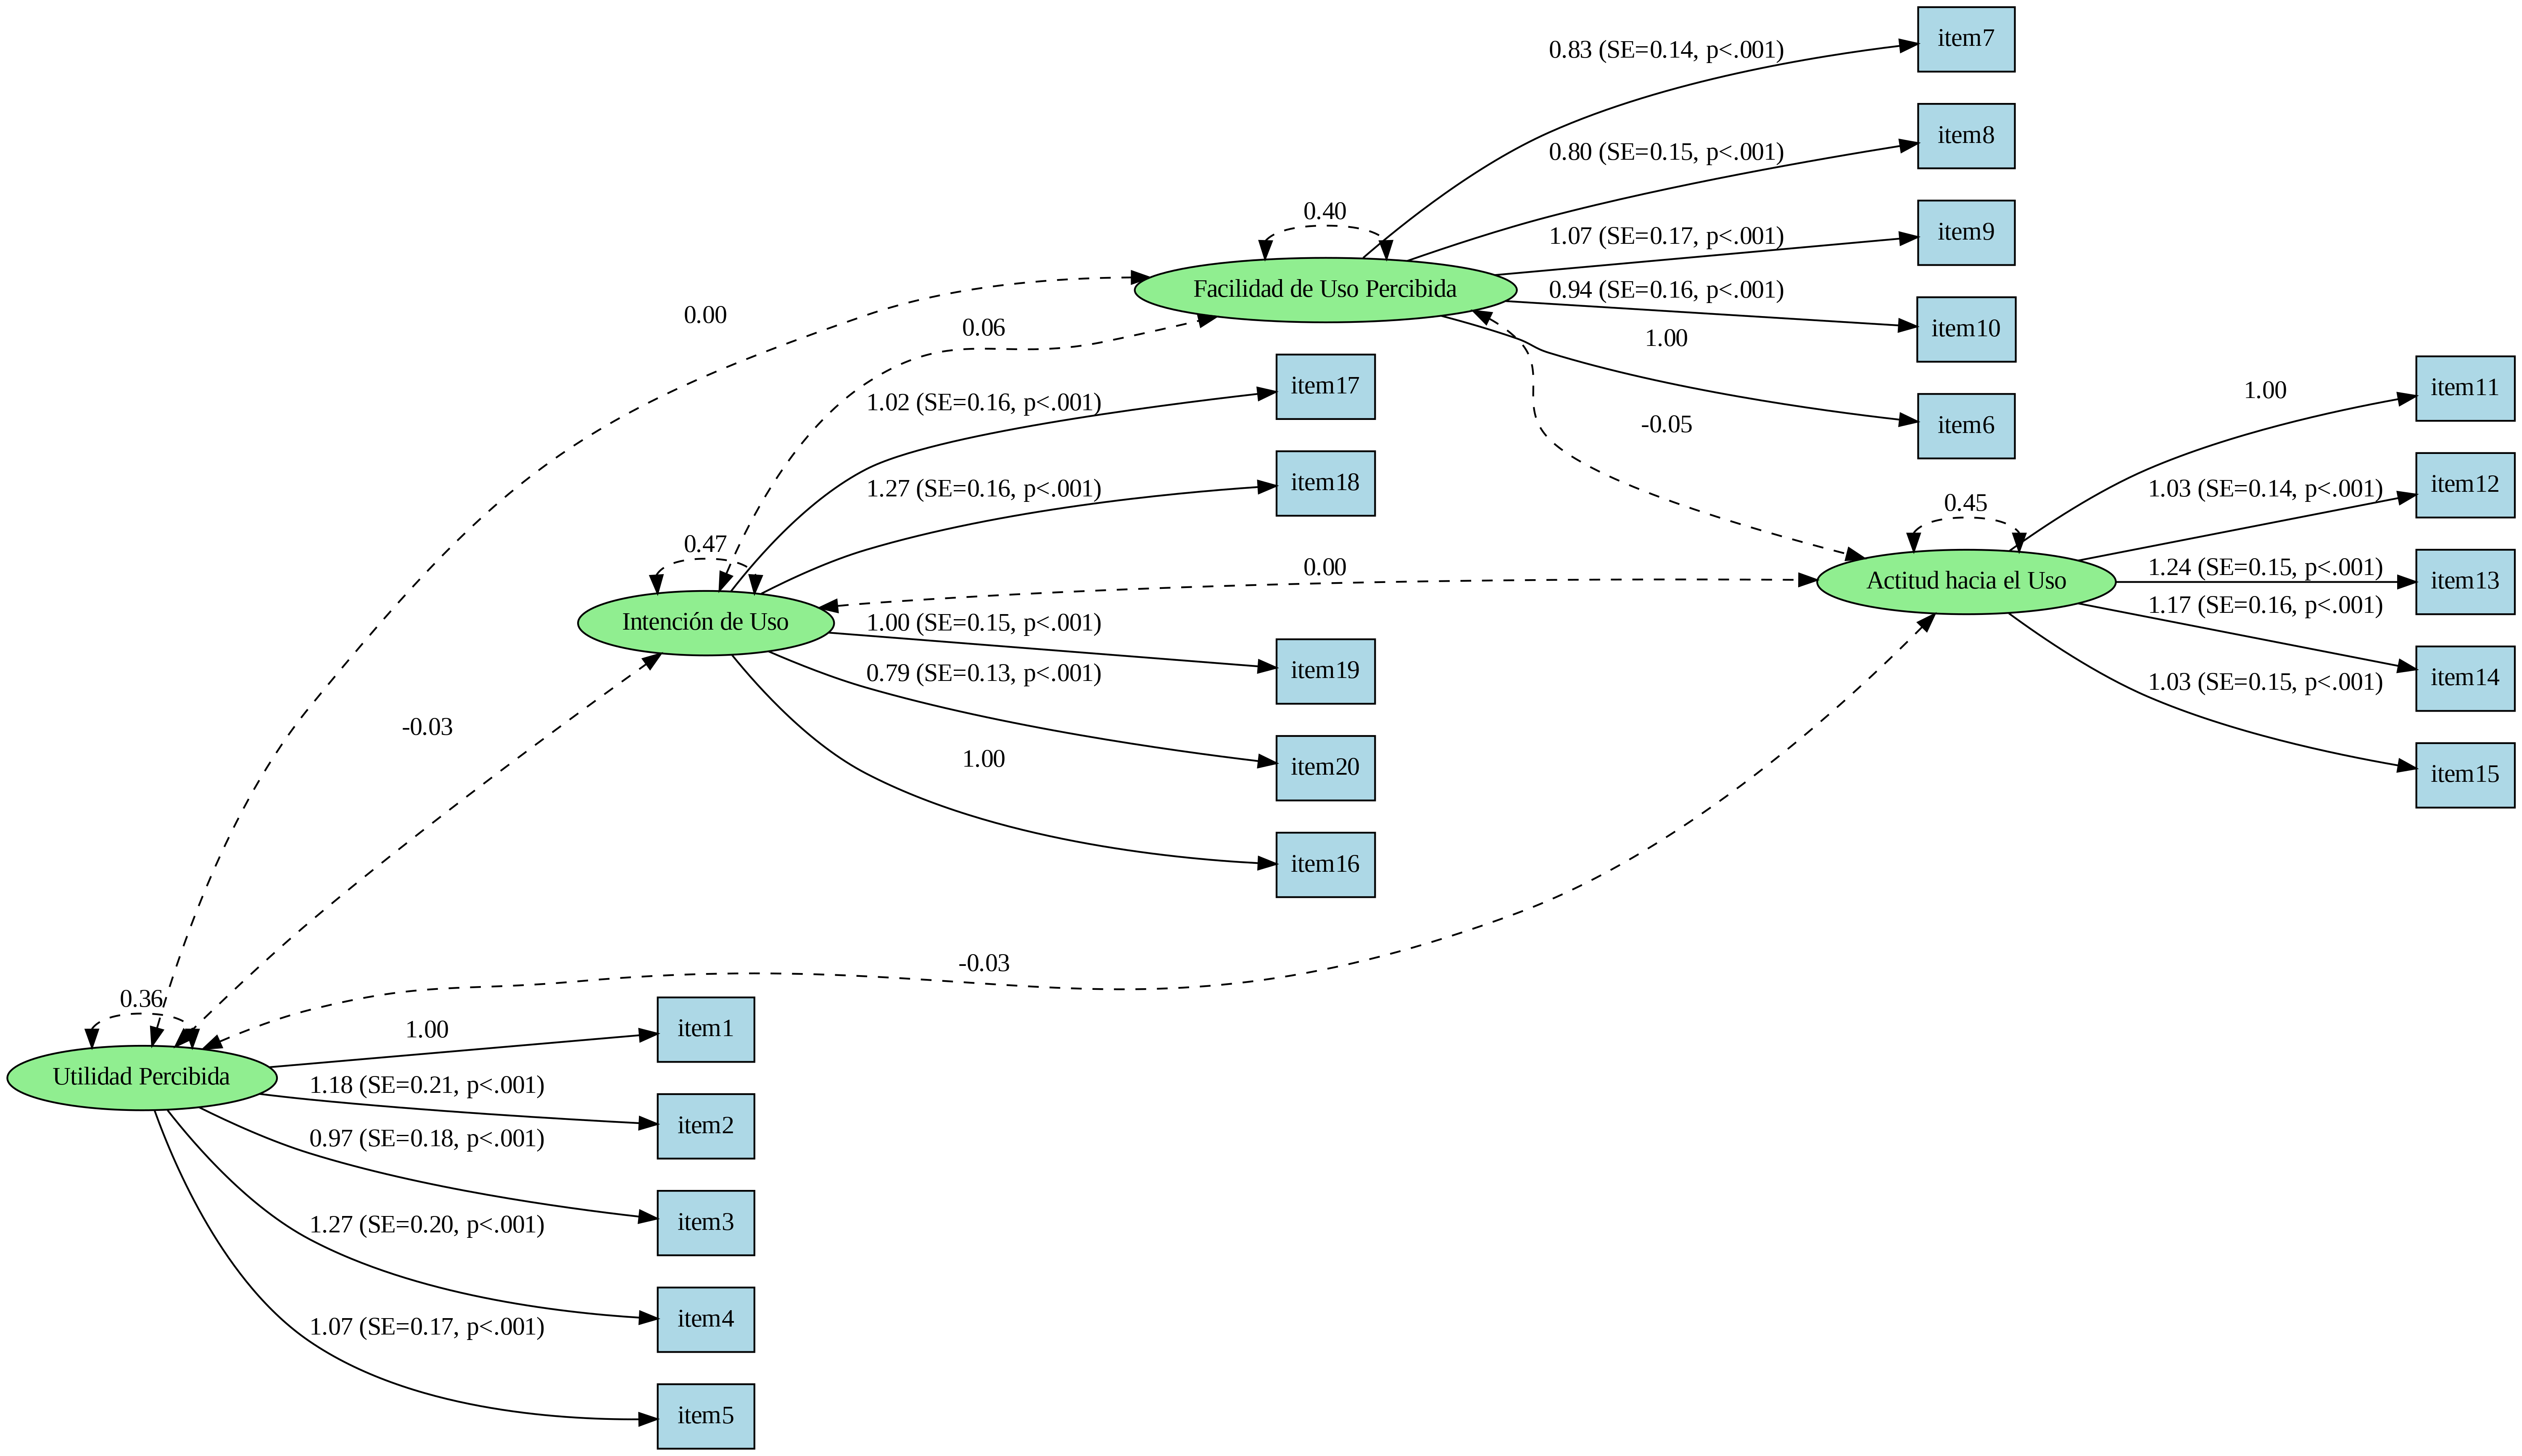

In [54]:
from graphviz import Digraph

# Crear el diagrama de ruta
dot = Digraph(format='png')
dot.attr(rankdir='LR', size='10,8')
dot.attr('graph', dpi='600')  # Aumentar la resolución
dot.attr('node', shape='box', style='filled', fillcolor='lightblue')

# Factores latentes
factors = {
    'UP': 'Utilidad Percibida',
    'FUP': 'Facilidad de Uso Percibida',
    'AU': 'Actitud hacia el Uso',
    'IU': 'Intención de Uso'
}

for code, name in factors.items():
    dot.node(code, name, shape='ellipse', fillcolor='lightgreen')

# Cargas factoriales con error estándar y p-valor (de tu tabla)
loadings_full = {
    'item1': (1.00, None, None),
    'item2': (1.182652,  0.209049, 0.0),
    'item3': ( 0.965739,  0.182691, 0.0),
    'item4': (1.268054,  0.204918, 0.0),
    'item5': (1.065518,  0.171619, 0.0),
    'item6': (1.00, None, None),
    'item7': (0.834653,  0.140629, 0.0),
    'item8': (0.798459,  0.154404, 0.0),
    'item9': (1.072477,  0.169318, 0.0),
    'item10':  (0.939762,  0.155824, 0.0),
    'item11': (1.00, None, None),
    'item12': (1.032608,  0.143555, 0.0),
    'item13': (1.236124,  0.154419, 0.0),
    'item14': (1.172553,  0.155774, 0.0),
    'item15': (1.034356,  0.145591, 0.0),
    'item16': (1.00, None, None),
    'item17': (1.019341,  0.161691, 0.0),
    'item18': (1.266667,   0.16131, 0.0),
    'item19': (0.997018,  0.146478, 0.0),
    'item20': (0.793661,  0.128994, 0.0),
}

# Variables observadas agrupadas por factor
observed = {
    'UP': ['item1', 'item2', 'item3', 'item4', 'item5'],
    'FUP': ['item6', 'item7', 'item8', 'item9', 'item10'],
    'AU': ['item11', 'item12', 'item13', 'item14', 'item15'],
    'IU': ['item16', 'item17', 'item18', 'item19', 'item20']
}

# Añadir nodos y relaciones con etiquetas detalladas
for factor, items in observed.items():
    for item in items:
        dot.node(item, item)
        estimate, se, p = loadings_full.get(item, (None, None, None))

        if estimate is not None:
            label = f"{estimate:.2f}"
            if se is not None:
                label += f" (SE={se:.2f}"
                if p is not None:
                    label += ", p<.001)" if p < 0.001 else f", p={p:.3f})"
                else:
                    label += ")"
        else:
            label = ""
        dot.edge(factor, item, label=label)

# Relaciones entre factores latentes con valores
factor_relations = [
    ('AU', 'AU', 0.453462), ('FUP', 'FUP', 0.397125), ('FUP', 'AU', -0.053823),
    ('IU', 'IU', 0.472337), ('IU', 'AU', 0.003793), ('IU', 'FUP', 0.057389),
    ('UP', 'UP', 0.356593), ('UP', 'AU', -0.026206), ('UP', 'FUP', 0.002197),
    ('UP', 'IU', -0.030378)
]

for f1, f2, estimate in factor_relations:
    dot.edge(f1, f2, label=f"{estimate:.2f}", dir='both', style='dashed')

# Renderizar el diagrama
path = '/mnt/data/path_diagram_TAM_AFC_labels1'
dot.render(path)

# Ruta de la imagen
image_path = '/mnt/data/path_diagram_TAM_AFC_labels1.png'

# Mostrar la imagen
from IPython.display import Image
Image(filename=image_path)
